In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv("bestsellers with categories.csv")

In [12]:
# Виведіть перші п'ять рядків (використовується функція head)
print(df.head)

<bound method NDFrame.head of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson    

In [13]:
# Виведіть розміри датасету (використовуйте атрибут shape)
df_size = df.shape
print(df_size)

books_in_df = df_size[0]
print(f'Про скільки книг зберігає дані датасет? Відповідь: {books_in_df}')

(550, 7)
Про скільки книг зберігає дані датасет? Відповідь: 550


In [14]:
# Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [15]:
unique_books_count = len(df['name'].drop_duplicates())
print(f'Про скільки книг зберігає дані датасет? Відповідь: {unique_books_count}')

Про скільки книг зберігає дані датасет? Відповідь: 351


In [16]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
# Відповідь: Чи є в якихось змінних пропуски? (Так / ні)

na_per_column = df.isna().sum()
print(na_per_column)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [17]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

uniq_genre = df['genre'].unique()
print(uniq_genre)
print(f'Які є унікальні жанри? Відповідь: {uniq_genre}')

['Non Fiction' 'Fiction']
Які є унікальні жанри? Відповідь: ['Non Fiction' 'Fiction']


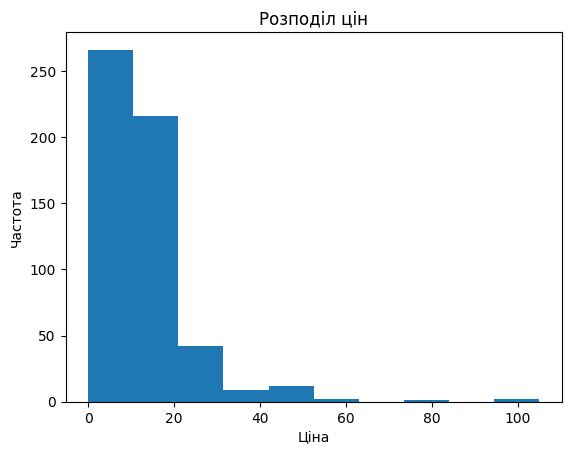

In [18]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

df['price'].plot(kind='hist')

plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

In [19]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна? Відповідь: {max_price}")
print(f"Мінімальна ціна? Відповідь: {min_price}")
print(f"Середня ціна? Відповідь: {mean_price}")
print(f"Медіанна ціна? Відповідь: {median_price}")

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


In [20]:
# Пошук та сортування даних

max_rating = df['user_rating'].max()
print(f'Який рейтинг у датасеті найвищий? Відповідь: {max_rating}')

books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f'Скільки книг мають такий рейтинг? Відповідь: {books_with_max_rating}')

max_reviews_index = df['reviews'].idxmax()
book_with_most_reviews = df.loc[max_reviews_index]
print(f'Яка книга має найбільше відгуків? Відповідь: {books_with_max_rating}')

data_2015 = df[df['year'] == 2015]
top_50_2015 = data_2015.nlargest(50, 'price')
most_expensive_2015 = top_50_2015.nlargest(1, 'price')
print(f'З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: {most_expensive_2015}')

data_2010_fiction = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
fiction_in_top_50_2010 = data_2010_fiction.shape[0]
print(f'Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: {fiction_in_top_50_2010}')

data_4_9_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
count_4_9_2010_2011 = data_4_9_2010_2011.shape[0]
print(f'Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: {fiction_in_top_50_2010}')

data_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_data_2015_under_8 = data_2015_under_8.sort_values(by='price')
last_book_sorted = sorted_data_2015_under_8.iloc[-1]
print(f'Яка книга остання у відсортованому списку? Відповідь: {last_book_sorted}')

Який рейтинг у датасеті найвищий? Відповідь: 4.9
Скільки книг мають такий рейтинг? Відповідь: 52
Яка книга має найбільше відгуків? Відповідь: 52
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь:                                                   name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 20
Яка книга остання у відсортованому списку? Відповідь: name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                          

In [21]:
# Агрегування даних та з'єднання таблиць

genre_price_stats = df.groupby('genre')['price'].agg(['min', 'max'])
print(genre_price_stats)

max_price_fiction = genre_price_stats.loc['Fiction', 'max']
min_price_fiction = genre_price_stats.loc['Fiction', 'min']

max_price_non_fiction = genre_price_stats.loc['Non Fiction', 'max']
min_price_non_fiction = genre_price_stats.loc['Non Fiction', 'min']

print(f'Максимальна ціна для жанру Fiction: Відповідь: {max_price_fiction}')
print(f'Мінімальна ціна для жанру Fiction: Відповідь: {min_price_fiction}')
print(f'Максимальна ціна для жанру Non Fiction: Відповідь: {max_price_non_fiction}')
print(f'Мінімальна ціна для жанру Non Fiction: Відповідь: {min_price_non_fiction}')

             min  max
genre                
Fiction        0   82
Non Fiction    0  105
Максимальна ціна для жанру Fiction: Відповідь: 82
Мінімальна ціна для жанру Fiction: Відповідь: 0
Максимальна ціна для жанру Non Fiction: Відповідь: 105
Мінімальна ціна для жанру Non Fiction: Відповідь: 0


In [22]:
# Групування та підрахунок кількості книг для кожного автора

author_book_count = df.groupby('author')['name'].agg(book_count='count')
print(author_book_count)

dimensions = author_book_count.shape
author_most_books = author_book_count.idxmax()
num_books_author_most = author_book_count.max()

print(f'Якої розмірності вийшла таблиця? Відповідь: {dimensions}')
print(f'Який автор має найбільше книг? Відповідь: {author_most_books}')
print(f'Скільки книг цього автора? Відповідь: {num_books_author_most}')

                            book_count
author                                
Abraham Verghese                     2
Adam Gasiewski                       1
Adam Mansbach                        1
Adir Levy                            1
Admiral William H. McRaven           1
...                                ...
Walter Isaacson                      3
William Davis                        2
William P. Young                     2
Wizards RPG Team                     3
Zhi Gang Sha                         2

[248 rows x 1 columns]
Якої розмірності вийшла таблиця? Відповідь: (248, 1)
Який автор має найбільше книг? Відповідь: book_count    Jeff Kinney
dtype: object
Скільки книг цього автора? Відповідь: book_count    12
dtype: int64


In [23]:
# Створення датафрейму з середнім рейтингом для кожного автора

author_avg_rating = df.groupby('author')['user_rating'].agg(avg_rating='mean')
print(author_avg_rating)

author_min_avg_rating = author_avg_rating.idxmin()
min_avg_rating = author_avg_rating.min()

print(f'У якого автора середній рейтинг мінімальний? Відповідь: {author_min_avg_rating}')
print(f'Який у цього автора середній рейтинг? Відповідь: {min_avg_rating}')

                            avg_rating
author                                
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
...                                ...
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000

[248 rows x 1 columns]
У якого автора середній рейтинг мінімальний? Відповідь: avg_rating    Donna Tartt
dtype: object
Який у цього автора середній рейтинг? Відповідь: avg_rating    3.9
dtype: float64


In [24]:
# З'єднання датафреймів для кожного автора, що містить кількість книг та середній рейтинг

author_info = pd.concat([author_book_count, author_avg_rating], axis=1)
author_info_sorted = author_info.sort_values(by=['book_count', 'avg_rating'])

first_author = author_info_sorted.index[0]
print(f'Який автор перший у списку? Відповідь: {first_author}')

Який автор перший у списку? Відповідь: Muriel Barbery
